In [42]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  
print(gpus)  

if gpus:  
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[]


In [43]:
import glob
from PIL import Image

all_images=[]

all_labels=[]

img_size=(96,96)

for f in glob.glob('c:\\data\\foods\\**\\*.jpg', recursive=True):
    arr=f.split('\\')
    img = Image.open(f)
    img_resize = img.resize((img_size[0], img_size[1]))
    all_images.append(img_resize)
    label=0

    if arr[4]=='Chicken':
        label=0

    elif arr[4]=='Dolsot':
        label=1

    elif arr[4]=='Jeyug':
        label=2

    elif arr[4]=='Kimchi':
        label=3

    elif arr[4]=='Samgyeob':
        label=4

    elif arr[4]=='Soybean':                                      
        label=5

    all_labels.append(label)

In [44]:
import numpy as np

X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))

X.shape  

(239, 96, 96, 3)

In [45]:
X = np.delete(X, (0), axis=0) # 첫번째 blank 이미지 삭제

In [46]:
X.shape 

(238, 96, 96, 3)

In [47]:
y=np.array(all_labels)
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

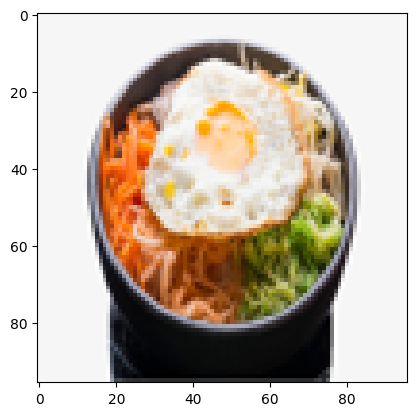

In [65]:
import matplotlib.pyplot as plt

plt.imshow(all_images[100])
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True,  random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 96, 96, 3), (48, 96, 96, 3), (190,), (48,))

In [68]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

0
0    40
1    32
3    32
5    32
2    30
4    24
Name: count, dtype: int64

In [51]:
X_train=X_train.reshape(-1,img_size[0]*img_size[1]*3)
X_test=X_test.reshape(-1,img_size[0]*img_size[1]*3)

In [52]:
X_train=X_train/255.
X_test=X_test/255.

In [53]:
X_train=X_train.reshape(-1,img_size[0],img_size[1],3)
X_test=X_test.reshape(-1,img_size[0],img_size[1],3)

In [54]:
y_train[:10]

array([3, 5, 1, 4, 3, 1, 4, 2, 4, 3])

In [55]:
from tensorflow.keras import utils

y_train_backup=y_train
y_test_backup=y_test
y_train=utils.to_categorical(y_train,6)
y_test=utils.to_categorical(y_test,6)

In [56]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten

model=Sequential()
model.add(Conv2D(64,(3,3),padding="same", input_shape=X_train.shape[1:],activation='tanh'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="tanh"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16,(3,3),activation="tanh"))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(6,activation="softmax"))          
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 7056)             

In [58]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/models/food_best.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=100, callbacks=[checkpoint])

Epoch 1/100
5/5 [==============================] - ETA: 0s - loss: 4.1016 - accuracy: 0.1908
Epoch 1: val_accuracy improved from -inf to 0.13158, saving model to c:/data/models\food_best.h5
5/5 [==============================] - 2s 254ms/step - loss: 4.1016 - accuracy: 0.1908 - val_loss: 2.5386 - val_accuracy: 0.1316
Epoch 2/100
5/5 [==============================] - ETA: 0s - loss: 2.4340 - accuracy: 0.2368
Epoch 2: val_accuracy did not improve from 0.13158
5/5 [==============================] - 1s 193ms/step - loss: 2.4340 - accuracy: 0.2368 - val_loss: 1.8689 - val_accuracy: 0.1316
Epoch 3/100
5/5 [==============================] - ETA: 0s - loss: 1.7544 - accuracy: 0.2961
Epoch 3: val_accuracy improved from 0.13158 to 0.34211, saving model to c:/data/models\food_best.h5
5/5 [==============================] - 1s 210ms/step - loss: 1.7544 - accuracy: 0.2961 - val_loss: 1.6159 - val_accuracy: 0.3421
Epoch 4/100
5/5 [==============================] - ETA: 0s - loss: 1.5740 - accuracy: 

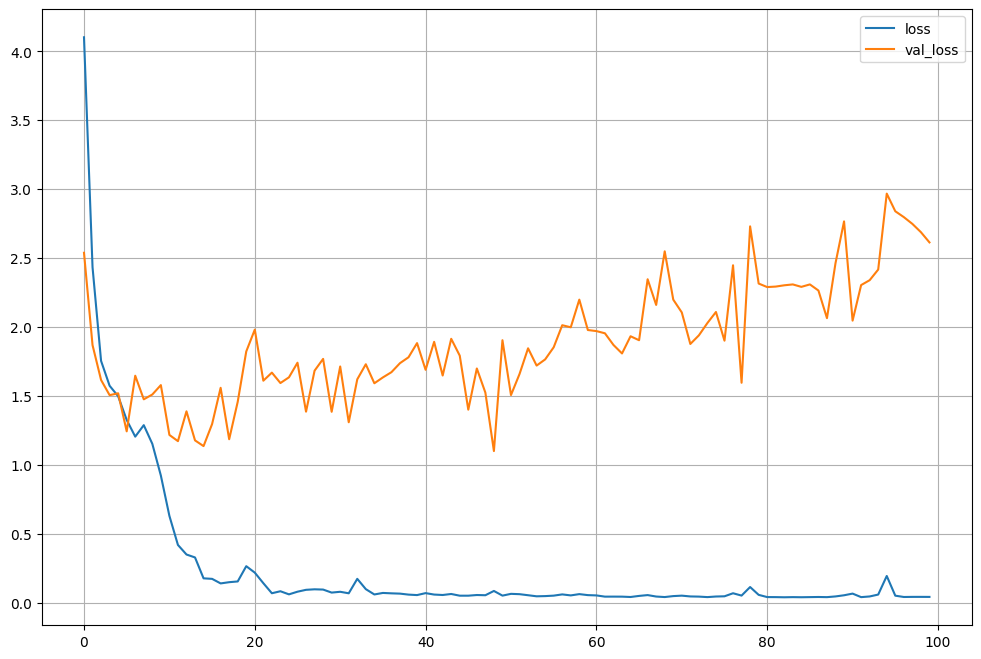

In [59]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

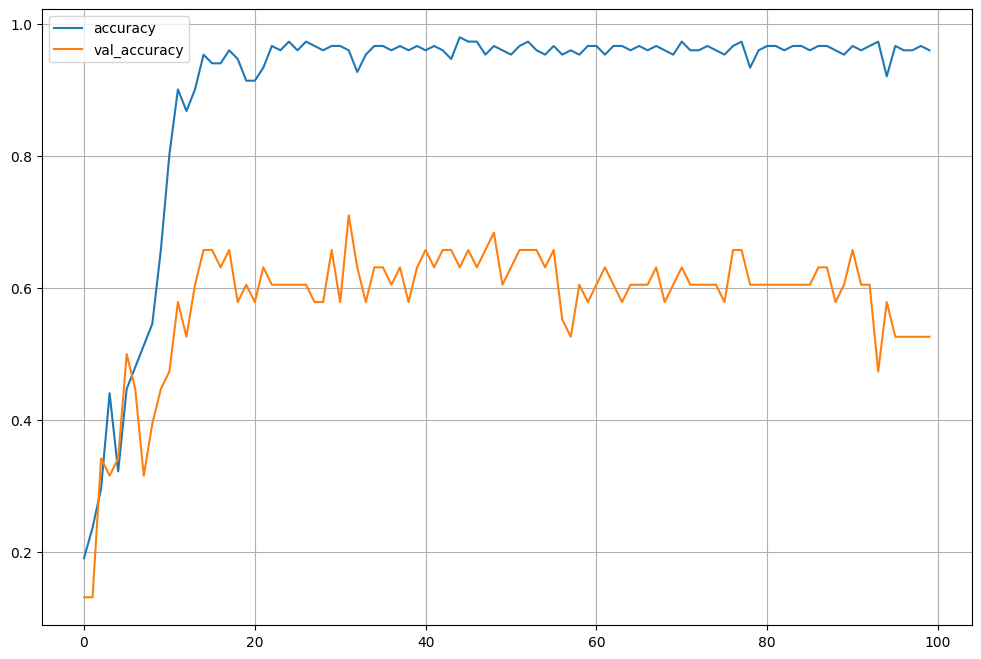

In [60]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.grid()
plt.show()

In [61]:
from keras.models import load_model

model = load_model('c:/data/models/food_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

6/6 [==============================] - 0s 39ms/step - loss: 0.3852 - accuracy: 0.9158
[0.3851830065250397, 0.9157894849777222]
accuracy: 91.58%


In [62]:
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

2/2 [==============================] - 0s 22ms/step - loss: 1.3968 - accuracy: 0.5625
[1.396781086921692, 0.5625]
accuracy: 56.25%


In [63]:
pred=model.predict(X_test)
np.argmax(pred,axis=1)

2/2 [==============================] - 0s 22ms/step


array([3, 5, 3, 0, 0, 0, 1, 2, 0, 5, 4, 3, 0, 3, 4, 2, 2, 3, 0, 0, 3, 5,
       3, 1, 5, 0, 5, 2, 0, 5, 1, 0, 3, 4, 5, 4, 4, 0, 3, 2, 1, 3, 0, 0,
       0, 2, 3, 3], dtype=int64)

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test_backup, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.50      0.70      0.58        10
           1       1.00      0.50      0.67         8
           2       0.67      0.50      0.57         8
           3       0.50      0.75      0.60         8
           4       0.40      0.33      0.36         6
           5       0.57      0.50      0.53         8

    accuracy                           0.56        48
   macro avg       0.61      0.55      0.55        48
weighted avg       0.61      0.56      0.56        48

